<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice.png' width=300/></center>

# [실습] 데이터프레임 집계

1) pandas 라이브러리를 pd 별칭을 주어 불러오세요.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

2) 다음 경로의 파일을 읽어 graduate 데이터프레임을 만드세요.
- 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/Graduate_apply.csv'

In [2]:
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/Graduate_apply.csv'
graduate = pd.read_csv(path)

graduate.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


3) 열의 데이터 형식과 값의 개수 등을 확인하세요.

In [5]:
graduate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


4) 기초통계정보를 확인하세요.

In [6]:
graduate.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


5) gre 중앙값을 확인하세요.

In [12]:
graduate['gre'].median()

580.0

6) rank별 gre 중앙값을 집계하여 tmp 데이터프레임으로 선언하고 확인하세요.

In [3]:
gre_tmp = graduate.groupby(by = 'rank', as_index= False)['gre'].median()
gre_tmp

,rank,gre
0,1,600
1,2,600
2,3,580
3,4,560


In [25]:
tmp_gre_median = graduate.groupby(by ='rank', as_index = False)[ ['gre'] ].median()
tmp_gre_median

,rank,gre
0,1,600
1,2,600
2,3,580
3,4,560


7) rank별 gpa 평균을 집계하여 tmp 데이터프레임으로 선언하고 확인하세요.

In [4]:
tmp_gpa = graduate.groupby(by = 'rank',as_index = False )['gpa'].mean()
tmp_gpa

,rank,gpa
0,1,3.453115
1,2,3.361656
2,3,3.432893
3,4,3.318358


In [27]:
tmp_gpa_mean = graduate.groupby(by ='rank', as_index = False)[ ['gpa'] ].mean()
tmp_gpa_mean

,rank,gpa
0,1,3.453115
1,2,3.361656
2,3,3.432893
3,4,3.318358


8) rank, admit별 gpa 평균을 집계하여 tmp 데이터프레임으로 선언하고 확인하세요.

In [4]:
tmp = graduate.groupby(by = ['rank','admit'], as_index = False)['gpa'].mean()
tmp

,rank,admit,gpa
0,1,0,3.345714
1,1,1,3.544242
2,2,0,3.316598
3,2,1,3.442593
4,3,0,3.402258
5,3,1,3.534643
6,4,0,3.291455
7,4,1,3.441667


In [6]:
tmp = graduate.groupby(by = ['rank','admit'],as_index = False)['gpa'].mean()
tmp

,rank,admit,gpa
0,1,0,3.345714
1,1,1,3.544242
2,2,0,3.316598
3,2,1,3.442593
4,3,0,3.402258
5,3,1,3.534643
6,4,0,3.291455
7,4,1,3.441667


In [30]:
tmp_3 = graduate.groupby(by =['rank','admit'], as_index = False)[['gpa']].mean()
tmp_3

,rank,admit,gpa
0,1,0,3.345714
1,1,1,3.544242
2,2,0,3.316598
3,2,1,3.442593
4,3,0,3.402258
5,3,1,3.534643
6,4,0,3.291455
7,4,1,3.441667


9) rank별 합격자 수를 집계하여 tmp 데이터프레임으로 선언하고 막대 그래프로 시각화하여 확인하세요.

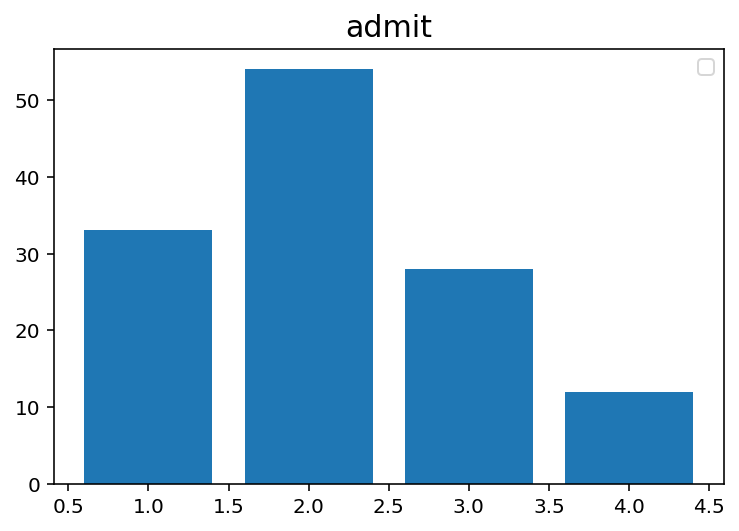

In [8]:
tmp_data = graduate.groupby(by = 'rank', as_index = False)['admit'].sum()

plt.title('admit', size = 15)
plt.legend( [ 'rank','admit'])
plt.bar(x = tmp_data['rank'], height = tmp_data['admit'])
plt.show()

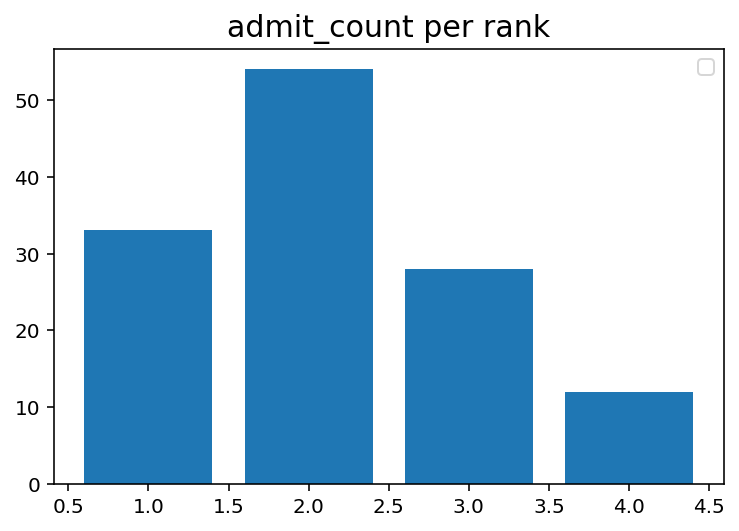

In [54]:
tmp_admit = graduate.groupby(by = 'rank',as_index = False)[['admit']].sum()

# plt.figure(figsize = (10, 3))
plt.title('admit_count per rank', size = 15)
plt.legend( ['rank', 'admit'])
plt.bar(x = tmp_admit['rank'], height = tmp_admit['admit'])
plt.show()

10) rank별 합격율을 집계하여 tmp 데이터프레임으로 선언하고 막대그래프로 시각화해 확인하세요.

- admit 열 값이 0, 1이므로 admit 열 평균이 합격율이 됨

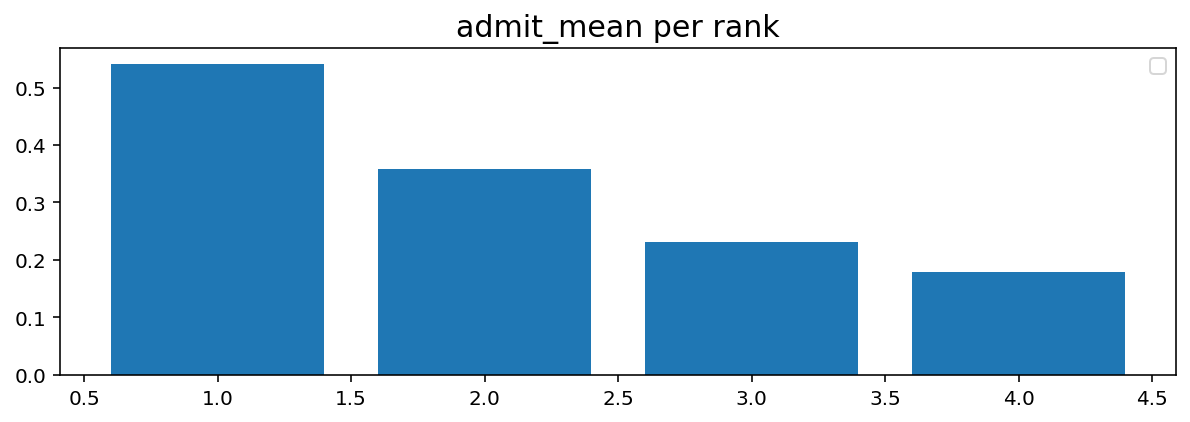

In [11]:
tmp_new = graduate.groupby(by = 'rank', as_index =False)['admit'].mean()

%config InlineBackend.figure_format = 'retina'
plt.figure(figsize = (10, 3))
# plt.plot( graduate[    ['rank', 'admit'] ])
plt.title('admit_mean per rank', size = 15)
plt.legend( ['rank', 'admit'])
plt.bar(x = tmp_new['rank'], height = tmp_new['admit'])
plt.show()

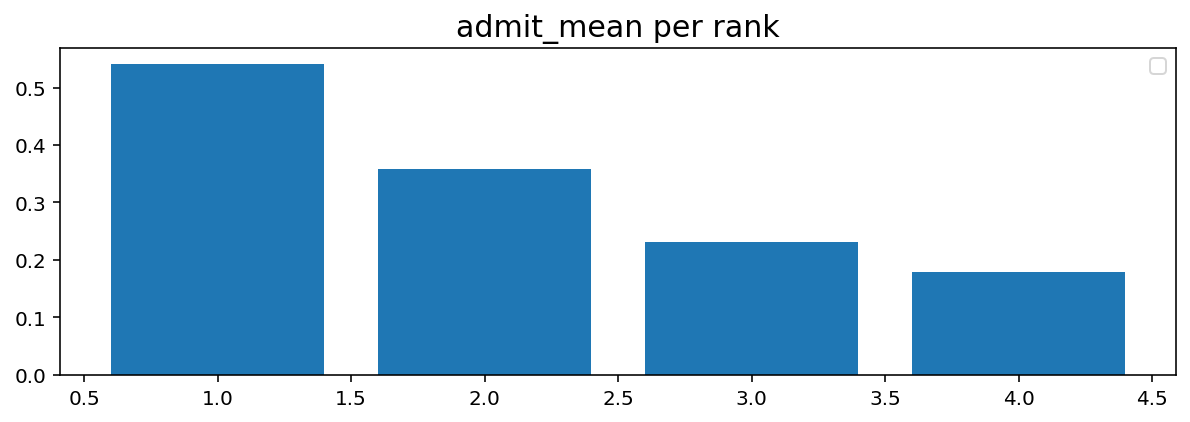

In [63]:
tmp_admit = graduate.groupby(by = 'rank',as_index = False)[['admit']].mean()
# print(tmp_admit['admit']*100)
plt.figure(figsize = (10, 3))
# plt.plot( graduate[    ['rank', 'admit'] ])
plt.title('admit_mean per rank', size = 15)
plt.legend( ['rank', 'admit'])
plt.bar(x = tmp_admit['rank'], height = tmp_admit['admit'])
plt.show()